### *Understanding How You Spend Your Time on Apple Devices*

Screen Time Analysis helps you track how you use your iPhone, iPad, or Mac. It provides a detailed report on which apps and websites you use the most, giving you valuable insights into your digital habits. This built-in feature is considered one of the best tools available for Apple users to monitor their screen time.

##### Key benefits of Screen Time Analysis:

- **Identify Your Top Time Spenders:** See which apps and websites capture most of your attention.
- **Gain Awareness:** Become more conscious of how you use your device throughout the day.
- **Make Informed Decisions:** Use the data to make adjustments to your digital habits if needed.

In [1]:
#importing libraries for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
screen_df = pd.read_csv("Screentime-App-Details.csv")
screen_df.head(3)

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram


In [3]:
screen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [4]:
# converting the column 'Date' from string to date time datatype

screen_df['date_t'] = pd.to_datetime(screen_df['Date'])

In [5]:
screen_df.head(5)

,Date,Usage,Notifications,Times opened,App,date_t
0,08/26/2022,38,70,49,Instagram,2022-08-26
1,08/27/2022,39,43,48,Instagram,2022-08-27
2,08/28/2022,64,231,55,Instagram,2022-08-28
3,08/29/2022,14,35,23,Instagram,2022-08-29
4,08/30/2022,3,19,5,Instagram,2022-08-30


In [6]:
# adding Day name against the dates

screen_df["Day"]=screen_df['date_t'].dt.day_name()

In [7]:
# weekday number is added, it takes values from 0 to 6, 0 being Monday 6 being Sunday

screen_df["weekday"]=screen_df['date_t'].dt.weekday
screen_df.head(3)

,Date,Usage,Notifications,Times opened,App,date_t,Day,weekday
0,08/26/2022,38,70,49,Instagram,2022-08-26,Friday,4
1,08/27/2022,39,43,48,Instagram,2022-08-27,Saturday,5
2,08/28/2022,64,231,55,Instagram,2022-08-28,Sunday,6


In [8]:
screen_df.shape

(54, 8)

In [9]:
# Checking for nulls in the data

screen_df.isnull().sum()

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
date_t           0
Day              0
weekday          0
dtype: int64

##### Preliminary analysis

In [10]:
screen_df.groupby("App").mean()

,Usage,Notifications,Times opened,weekday
App,,,,
Instagram,31.148148,44.296296,32.703704,3.0
Whatsapp,98.925926,191.111111,90.259259,3.0


### *Usage*

In [11]:
# it appears that the data has outliers, Mean and Range would not be robust for the anlaysis,
# Hence Median and Inter-Quartile range are considered

screen_inst = screen_df[screen_df["App"]=="Instagram"]
screen_whats = screen_df[screen_df["App"]=="Whatsapp"]

In [12]:
#instagram

q1_i = screen_inst["Usage"].quantile(0.25)
median_i = screen_inst["Usage"].quantile(0.5)
q3_i = screen_inst["Usage"].quantile(0.75)
median_i

19.0

In [13]:
#whatsapp

q1_w = screen_whats["Usage"].quantile(0.25)
median_w = screen_whats["Usage"].quantile(0.5)
q3_w = screen_whats["Usage"].quantile(0.75)
median_w

82.0

In [14]:
# customising the color palellete for the plots 

custom_palette = sns.color_palette(["#FCAF45", "#25D366"])

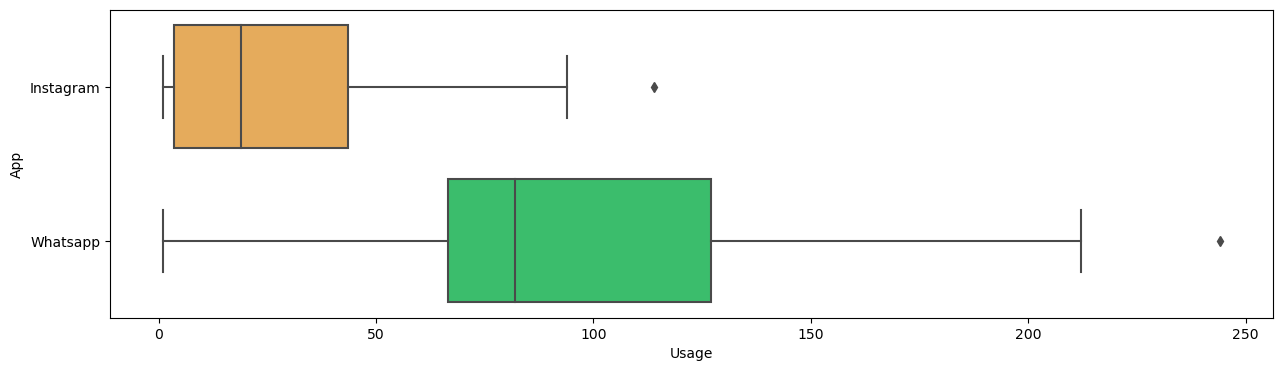

In [15]:
# to understand how the data is distributed and to verify the presence of outliers, boxplot is chosen

plt.figure(figsize=(15,4))
sns.boxplot(data=screen_df,x="Usage",y="App",orient="h",palette=custom_palette)
plt.show()

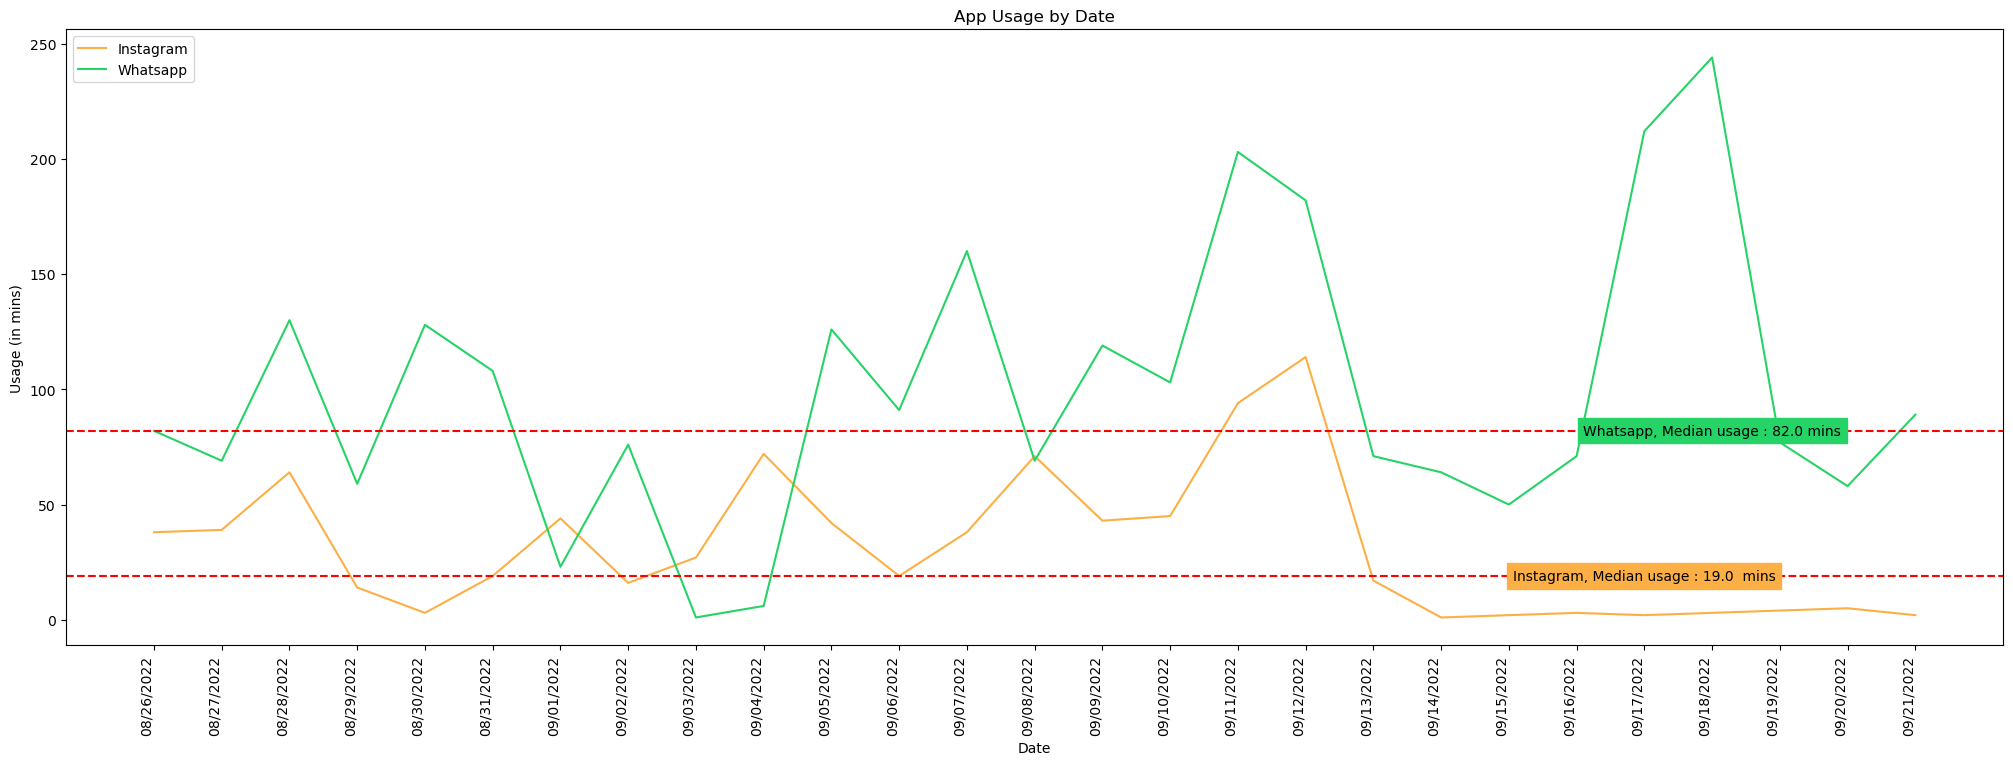

In [16]:
plt.figure(figsize=(25,8))

sns.lineplot(data=screen_df,x="Date",y="Usage",hue="App",palette=custom_palette)
plt.xticks(rotation=90, ha='right')


plt.axhline(y=median_i,color="red",linestyle="--")
plt.axhline(y=median_w,color="red",linestyle="--")

plt.text(22,median_i, f'Instagram, Median usage : {round(median_i,2)}  mins', fontsize=10, va='center', ha='center', backgroundcolor='#FCAF45')
plt.text(23,median_w, f'Whatsapp, Median usage : {round(median_w,2)} mins', fontsize=10, va='center', ha='center', backgroundcolor='#25D366')


plt.legend(fontsize=10,loc="upper left")
plt.title("App Usage by Date")
plt.ylabel("Usage (in mins)")

plt.show()

Overall the median usage of **Whatsapp is at 82 mins per day, while instagram is at 19 mins**

In [17]:
screen_df_grp = screen_df.groupby(["Day","App"]).median().reset_index()
screen_df_grp

,Day,App,Usage,Notifications,Times opened,weekday
0,Friday,Instagram,27.0,48.0,35.5,4.0
1,Friday,Whatsapp,79.0,192.5,104.0,4.0
2,Monday,Instagram,28.0,29.5,37.0,0.0
3,Monday,Whatsapp,101.5,193.5,113.0,0.0
4,Saturday,Instagram,33.0,29.0,36.5,5.0
5,Saturday,Whatsapp,86.0,138.5,73.5,5.0
6,Sunday,Instagram,68.0,104.5,42.5,6.0
7,Sunday,Whatsapp,166.5,178.0,89.0,6.0
8,Thursday,Instagram,44.0,23.0,43.0,3.0
9,Thursday,Whatsapp,50.0,181.0,58.0,3.0


In [18]:
max_usage_whatsapp = screen_df_grp[screen_df_grp["App"]=="Whatsapp"]["Usage"].max()
min_usage_whatsapp = screen_df_grp[screen_df_grp["App"]=="Whatsapp"]["Usage"].min()
print(f'Whatsapp, Max : {round(max_usage_whatsapp,2)}, Min : {round(min_usage_whatsapp,2)}')

Whatsapp, Max : 166.5, Min : 50.0


In [19]:
max_usage_instagram = screen_df_grp[screen_df_grp["App"]=="Instagram"]["Usage"].max()
min_usage_instagram = screen_df_grp[screen_df_grp["App"]=="Instagram"]["Usage"].min()
print(f'Instagram, Max : {round(max_usage_instagram,2)}, Min : {round(min_usage_instagram,2)}')

Instagram, Max : 68.0, Min : 10.5


In [20]:
max_day_whatsapp = screen_df_grp[screen_df_grp["Usage"]==max_usage_whatsapp]["Day"]
min_day_whatsapp = screen_df_grp[screen_df_grp["Usage"]==min_usage_whatsapp]["Day"]
print(f'Whatsapp, Max : {max_day_whatsapp}, Min : {min_day_whatsapp}')

Whatsapp, Max : 7    Sunday
Name: Day, dtype: object, Min : 9    Thursday
Name: Day, dtype: object


In [21]:
max_day_instagram = screen_df_grp[screen_df_grp["Usage"]==max_usage_instagram]["Day"]
min_day_instagram = screen_df_grp[screen_df_grp["Usage"]==min_usage_instagram]["Day"]
print(f'Instagram, Max : {max_day_instagram}, Min : {min_day_instagram}')


Instagram, Max : 6    Sunday
Name: Day, dtype: object, Min : 12    Wednesday
Name: Day, dtype: object


In [22]:
screen_df_grp = screen_df_grp.sort_values(by="weekday")

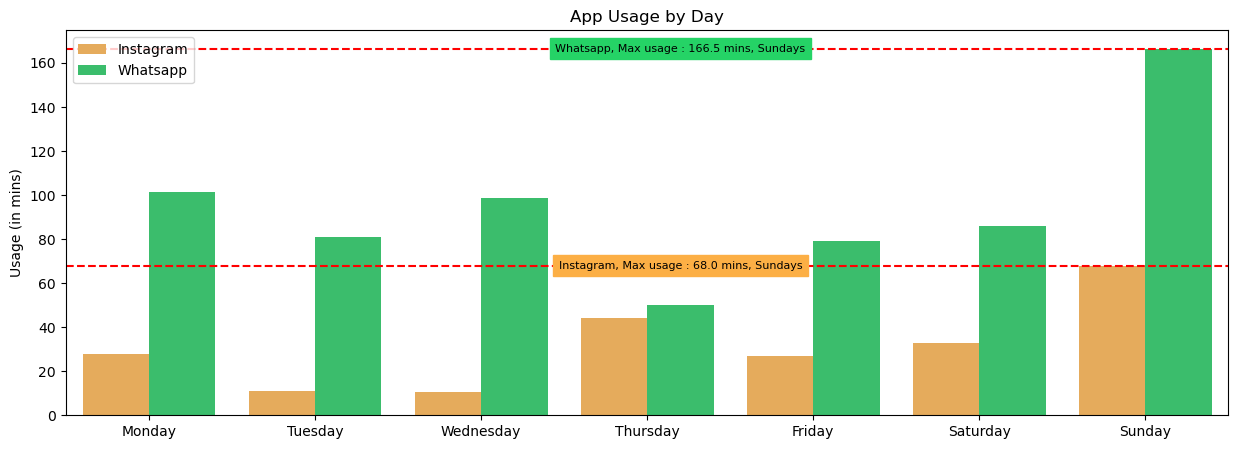

In [23]:
plt.figure(figsize=(15,5))

sns.barplot(data=screen_df_grp,x="Day",y="Usage",hue="App",palette=custom_palette)
# plt.xticks(rotation=90, ha='right')


plt.axhline(y=max_usage_whatsapp,color="red",linestyle="--")
plt.axhline(y=max_usage_instagram,color="red",linestyle="--")

plt.text(3.2,max_usage_instagram, f'Instagram, Max usage : {round(max_usage_instagram,2)} mins, {max_day_instagram.values[0]}s', fontsize=8, va='center', ha='center', backgroundcolor='#FCAF45')
plt.text(3.2,max_usage_whatsapp, f'Whatsapp, Max usage : {round(max_usage_whatsapp,2)} mins, {max_day_whatsapp.values[0]}s', fontsize=8, va='center', ha='center', backgroundcolor='#25D366')

plt.legend(fontsize=10,loc="upper left")
plt.title("App Usage by Day")
plt.xlabel("")
plt.ylabel("Usage (in mins)")

plt.show()

The max usage of instagram is on Sundays (68 mins), max usage of whatsapp is also on Sundays (166.5 mins)

### *Notifications*

In [24]:
#instagram

q1_in = screen_inst["Notifications"].quantile(0.25)
median_in = screen_inst["Notifications"].quantile(0.5)
q3_in = screen_inst["Notifications"].quantile(0.75)
median_in

25.0

In [25]:
#whatsapp

q1_wn = screen_whats["Notifications"].quantile(0.25)
median_wn = screen_whats["Notifications"].quantile(0.5)
q3_wn = screen_whats["Notifications"].quantile(0.75)
median_wn

183.0

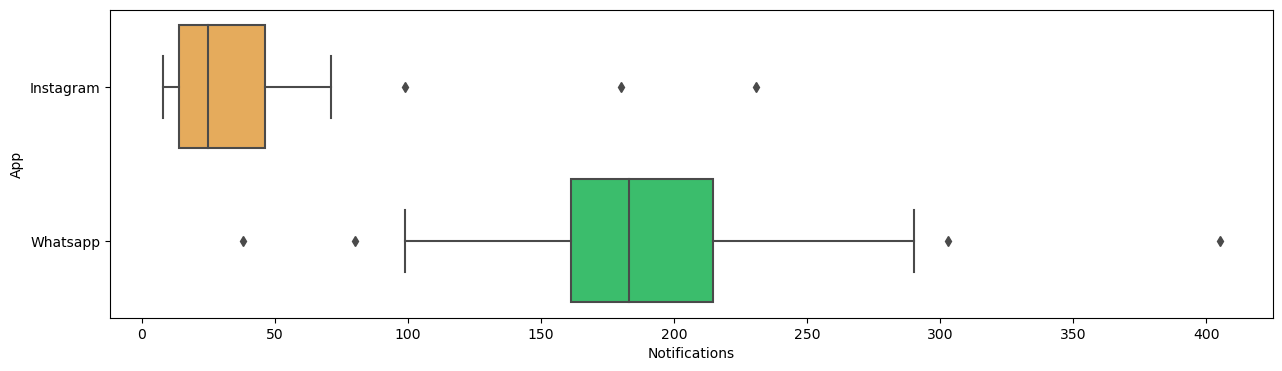

In [26]:
custom_palette = sns.color_palette(["#FCAF45", "#25D366"])
plt.figure(figsize=(15,4))
sns.boxplot(data=screen_df,x="Notifications",y="App",orient="h",palette=custom_palette)
plt.show()

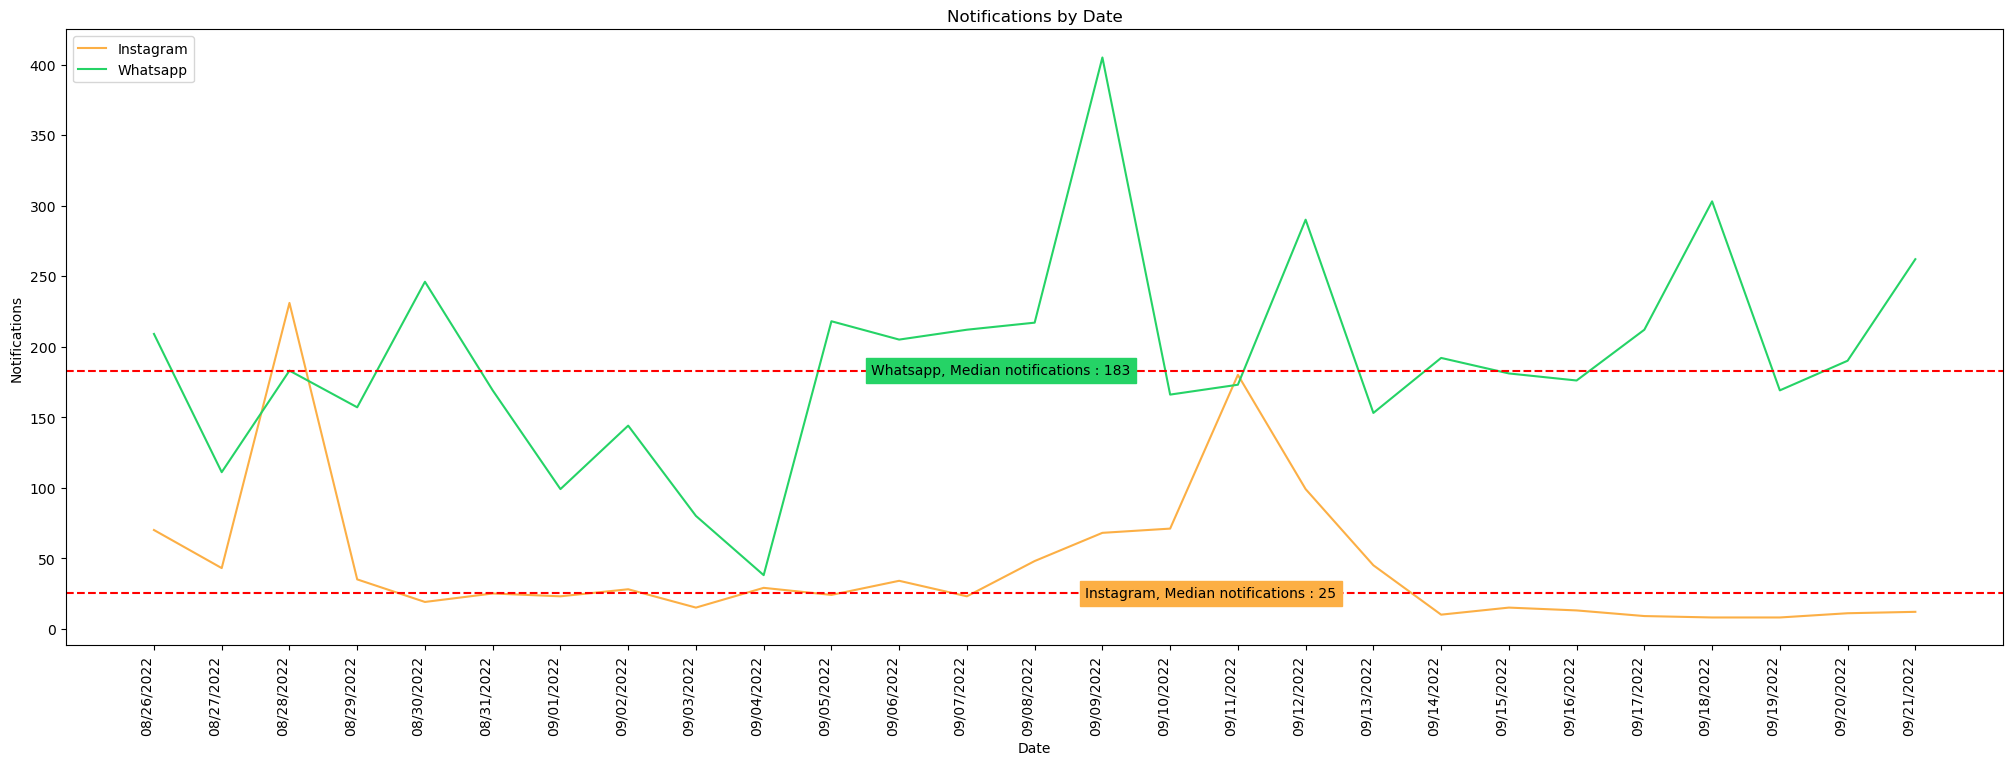

In [27]:
plt.figure(figsize=(25,8))

sns.lineplot(data=screen_df,x="Date",y="Notifications",hue="App",palette=custom_palette)
plt.xticks(rotation=90, ha='right')


plt.axhline(y=median_in,color="red",linestyle="--")
plt.axhline(y=median_wn,color="red",linestyle="--")

plt.text(15.6,median_in, f'Instagram, Median notifications : {round(median_in)}', fontsize=10, va='center', ha='center', backgroundcolor='#FCAF45')
plt.text(12.5,median_wn, f'Whatsapp, Median notifications : {round(median_wn)}', fontsize=10, va='center', ha='center', backgroundcolor='#25D366')


plt.legend(fontsize=10,loc="upper left")
plt.title("Notifications by Date")
plt.show()

Overall the median Notifications of **Whatsapp is at 183 per day, while instagram is at 25**

In [28]:
max_notifications_whatsapp = screen_df_grp[screen_df_grp["App"]=="Whatsapp"]["Notifications"].max()
min_notifications_whatsapp = screen_df_grp[screen_df_grp["App"]=="Whatsapp"]["Notifications"].min()
print(f'Whatsapp, Max : {round(max_notifications_whatsapp,2)}, Min : {round(min_notifications_whatsapp,2)}')

Whatsapp, Max : 202.0, Min : 138.5


In [29]:
max_notifications_instagram = screen_df_grp[screen_df_grp["App"]=="Instagram"]["Notifications"].max()
min_notifications_instagram = screen_df_grp[screen_df_grp["App"]=="Instagram"]["Notifications"].min()
print(f'Instagram, Max : {round(max_notifications_instagram,2)}, Min : {round(min_notifications_instagram,2)}')

Instagram, Max : 104.5, Min : 17.5


In [30]:
max_dayn_whatsapp = screen_df_grp[screen_df_grp["Notifications"]==max_notifications_whatsapp]["Day"]
min_dayn_whatsapp = screen_df_grp[screen_df_grp["Notifications"]==min_notifications_whatsapp]["Day"]
print(f'Whatsapp, Max : {max_dayn_whatsapp}, Min : {min_dayn_whatsapp}')

Whatsapp, Max : 13    Wednesday
Name: Day, dtype: object, Min : 5    Saturday
Name: Day, dtype: object


In [31]:
max_dayn_instagram = screen_df_grp[screen_df_grp["Notifications"]==max_notifications_instagram]["Day"]
min_dayn_instagram = screen_df_grp[screen_df_grp["Notifications"]==min_notifications_instagram]["Day"]
print(f'Instagram, Max : {max_dayn_instagram}, Min : {min_dayn_instagram}')

Instagram, Max : 6    Sunday
Name: Day, dtype: object, Min : 12    Wednesday
Name: Day, dtype: object


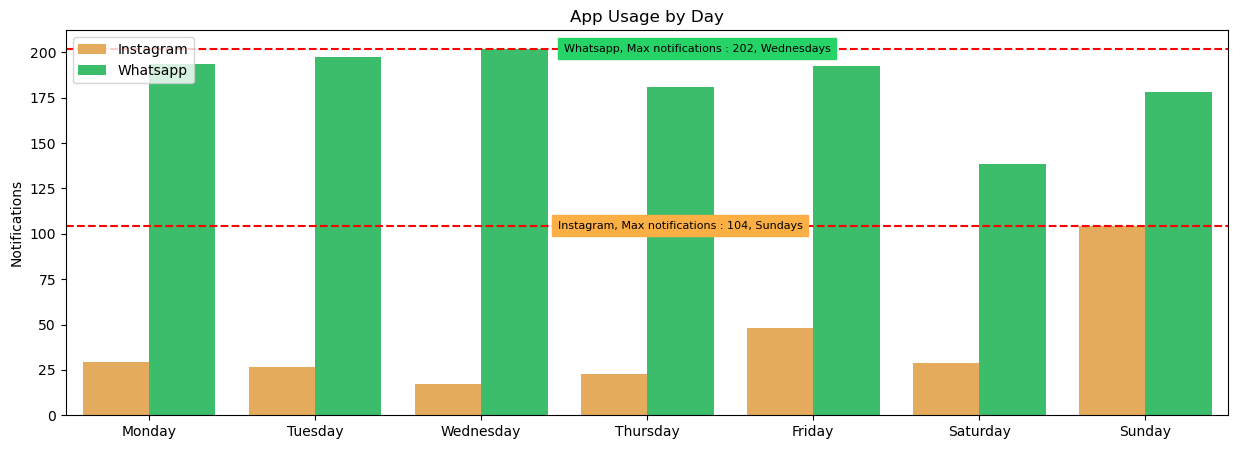

In [32]:
plt.figure(figsize=(15,5))

sns.barplot(data=screen_df_grp,x="Day",y="Notifications",hue="App",palette=custom_palette)
# plt.xticks(rotation=90, ha='right')


plt.axhline(y=max_notifications_whatsapp,color="red",linestyle="--")
plt.axhline(y=max_notifications_instagram,color="red",linestyle="--")

plt.text(3.2,max_notifications_instagram, f'Instagram, Max notifications : {round(max_notifications_instagram)}, {max_dayn_instagram.values[0]}s', fontsize=8, va='center', ha='center', backgroundcolor='#FCAF45')
plt.text(3.3,max_notifications_whatsapp, f'Whatsapp, Max notifications : {round(max_notifications_whatsapp)}, {max_dayn_whatsapp.values[0]}s', fontsize=8, va='center', ha='center', backgroundcolor='#25D366')

plt.legend(fontsize=10,loc="upper left")
plt.title("App Usage by Day")
plt.xlabel("")
plt.ylabel("Notifications")

plt.show()

The max notifications received on instagram is on Sundays (104), max usage of whatsapp is on Wednesdays (202)

### *Times Opened*

In [33]:
#instagram

q1_it = screen_inst["Times opened"].quantile(0.25)
median_it = screen_inst["Times opened"].quantile(0.5)
q3_it = screen_inst["Times opened"].quantile(0.75)
median_it

25.0

In [34]:
#whatsapp

q1_wt = screen_whats["Times opened"].quantile(0.25)
median_wt = screen_whats["Times opened"].quantile(0.5)
q3_wt = screen_whats["Times opened"].quantile(0.75)
median_wt

86.0

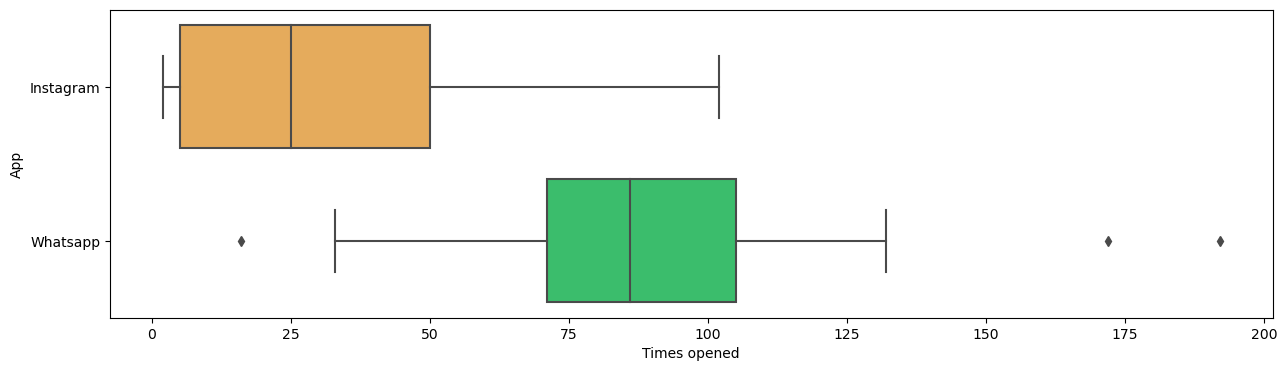

In [35]:
custom_palette = sns.color_palette(["#FCAF45", "#25D366"])
plt.figure(figsize=(15,4))
sns.boxplot(data=screen_df,x="Times opened",y="App",orient="h",palette=custom_palette)
plt.show()

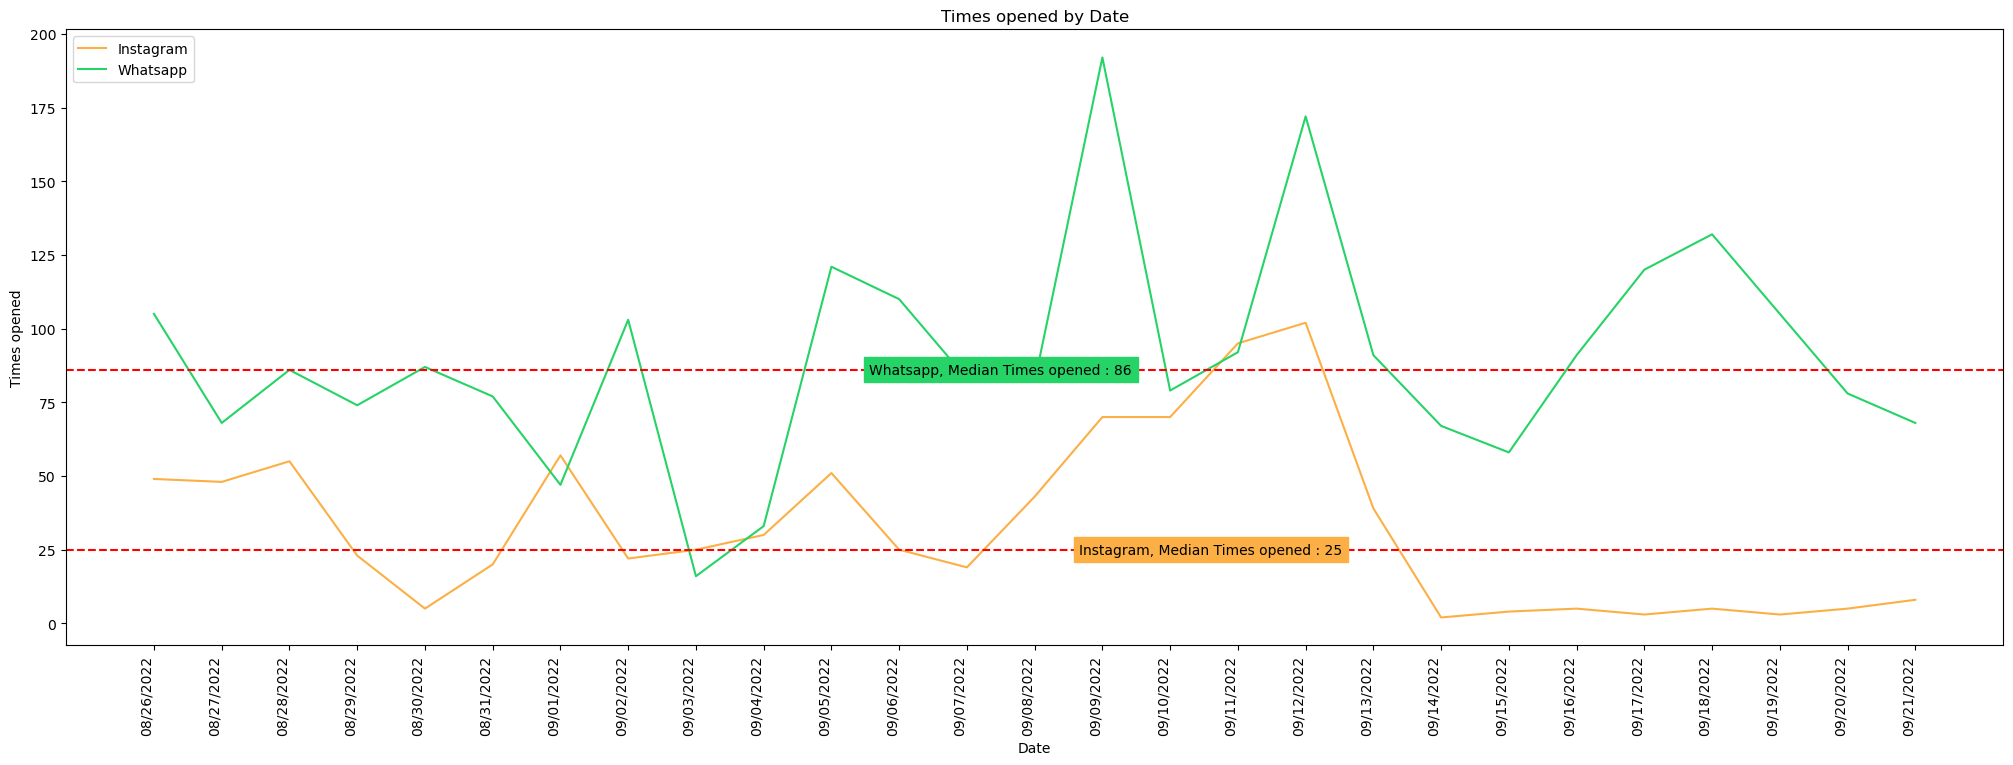

In [36]:
plt.figure(figsize=(25,8))

sns.lineplot(data=screen_df,x="Date",y="Times opened",hue="App",palette=custom_palette)
plt.xticks(rotation=90, ha='right')


plt.axhline(y=median_it,color="red",linestyle="--")
plt.axhline(y=median_wt,color="red",linestyle="--")

plt.text(15.6,median_it, f'Instagram, Median Times opened : {round(median_it)}', fontsize=10, va='center', ha='center', backgroundcolor='#FCAF45')
plt.text(12.5,median_wt, f'Whatsapp, Median Times opened : {round(median_wt)}', fontsize=10, va='center', ha='center', backgroundcolor='#25D366')


plt.legend(fontsize=10,loc="upper left")
plt.title("Times opened by Date")
plt.show()

Overall the median Times opened of **Whatsapp is at 86 per day, while instagram is at 25**

In [37]:
max_to_whatsapp = screen_df_grp[screen_df_grp["App"]=="Whatsapp"]["Times opened"].max()
min_to_whatsapp = screen_df_grp[screen_df_grp["App"]=="Whatsapp"]["Times opened"].min()
print(f'Whatsapp, Max : {round(max_to_whatsapp)}, Min : {round(min_to_whatsapp)}')

Whatsapp, Max : 113, Min : 58


In [38]:
max_to_instagram = screen_df_grp[screen_df_grp["App"]=="Instagram"]["Times opened"].max()
min_to_instagram = screen_df_grp[screen_df_grp["App"]=="Instagram"]["Times opened"].min()
print(f'Instagram, Max : {round(max_to_instagram)}, Min : {round(min_to_instagram)}')

Instagram, Max : 43, Min : 14


In [39]:
max_dayt_whatsapp = screen_df_grp[screen_df_grp["Times opened"]==max_to_whatsapp]["Day"]
min_dayt_whatsapp = screen_df_grp[screen_df_grp["Times opened"]==min_to_whatsapp]["Day"]
print(f'Whatsapp, Max : {max_dayt_whatsapp}, Min : {min_dayt_whatsapp}')

Whatsapp, Max : 3    Monday
Name: Day, dtype: object, Min : 9    Thursday
Name: Day, dtype: object


In [40]:
max_dayt_instagram = screen_df_grp[screen_df_grp["Times opened"]==max_to_instagram]["Day"]
min_dayt_instagram = screen_df_grp[screen_df_grp["Times opened"]==min_to_instagram]["Day"]
print(f'Instagram, Max : {max_dayt_instagram}, Min : {min_dayt_instagram}')

Instagram, Max : 8    Thursday
Name: Day, dtype: object, Min : 12    Wednesday
Name: Day, dtype: object


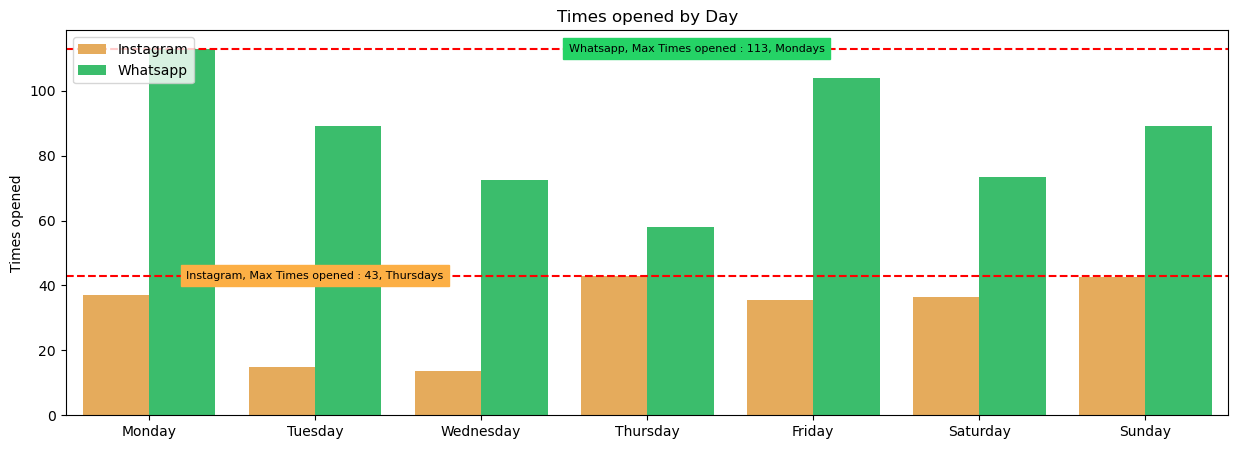

In [41]:
plt.figure(figsize=(15,5))

sns.barplot(data=screen_df_grp,x="Day",y="Times opened",hue="App",palette=custom_palette)
# plt.xticks(rotation=90, ha='right')


plt.axhline(y=max_to_whatsapp,color="red",linestyle="--")
plt.axhline(y=max_to_instagram,color="red",linestyle="--")

plt.text(1,max_to_instagram, f'Instagram, Max Times opened : {round(max_to_instagram)}, {max_dayt_instagram.values[0]}s', fontsize=8, va='center', ha='center', backgroundcolor='#FCAF45')
plt.text(3.3,max_to_whatsapp, f'Whatsapp, Max Times opened : {round(max_to_whatsapp)}, {max_dayt_whatsapp.values[0]}s', fontsize=8, va='center', ha='center', backgroundcolor='#25D366')

plt.legend(fontsize=10,loc="upper left")
plt.title("Times opened by Day")
plt.xlabel("")


plt.show()

The max times opened instagram was opened was on Thursdays (43), max times whatsapp was opened on Wednesdays (113)

### *Relationship between Usage and Notifications*

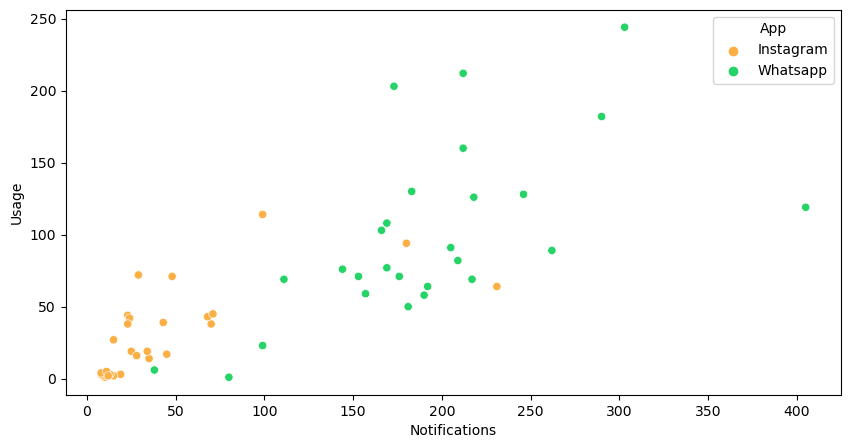

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=screen_df,y="Usage",x="Notifications",hue="App",palette=custom_palette)
plt.show()

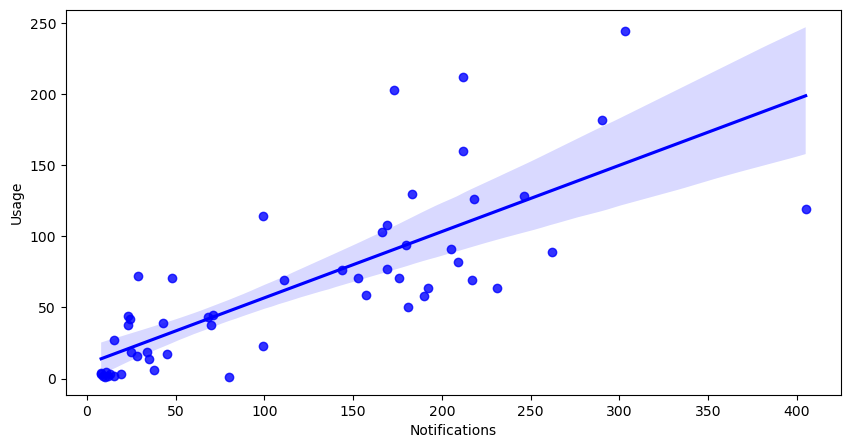

In [43]:
plt.figure(figsize=(10,5))
sns.regplot(data=screen_df,y="Usage",x="Notifications",color="blue")
plt.show()

The relationship between the notifications received and the usage is linear. Thus we can conclude that the user was prompted to use the phone more on days when they received more notifications

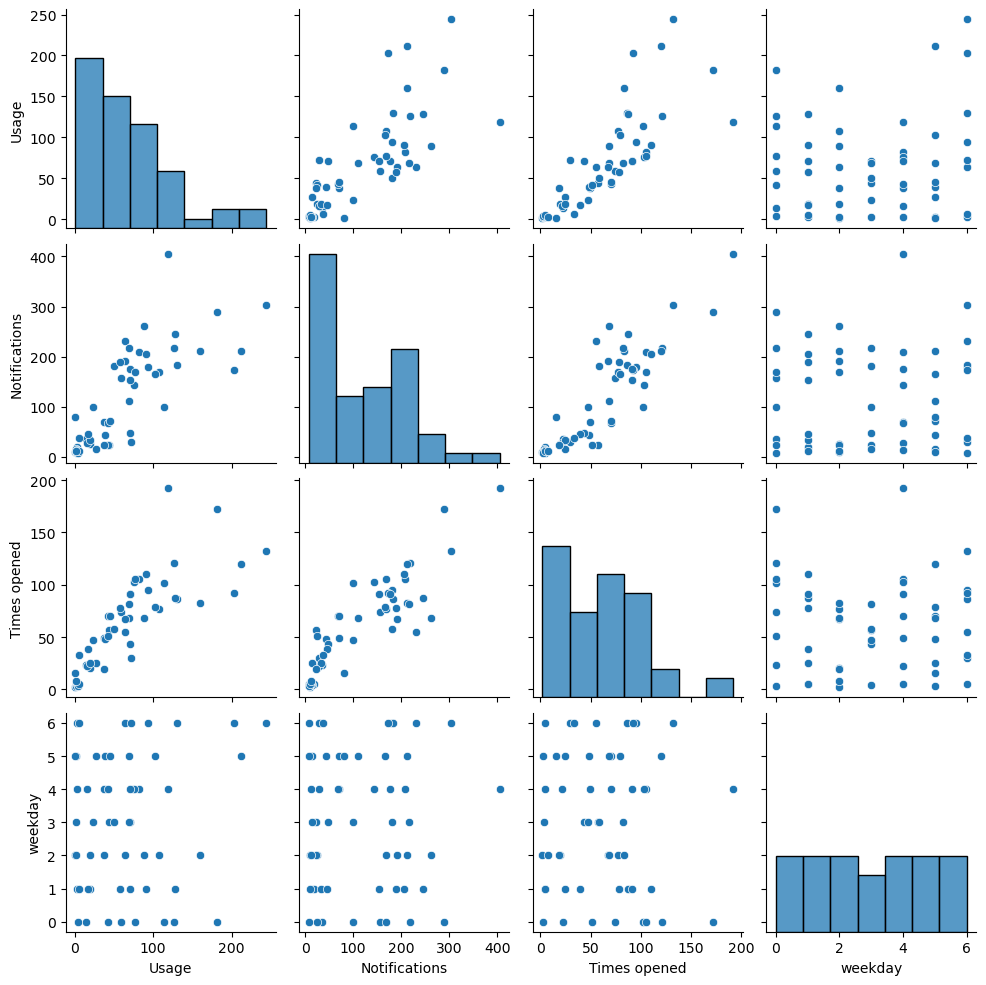

In [44]:
sns.pairplot(screen_df)